<a href="https://colab.research.google.com/github/FaithKare/Hypothesis-testing-on-electric-car-sharing-service/blob/master/Faith_Wangari_Moringa_DS_week_4_coreIP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HYPOTHEIS TESTING COLAB 

In [ ]:
#importing the libraries to used 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset and preview of the top of the dataset
df = pd.read_csv("autolib_daily_events_postal_code.csv")
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#preview of the bottom of the dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
df.shape

(16085, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


## **DATA CLEANING**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


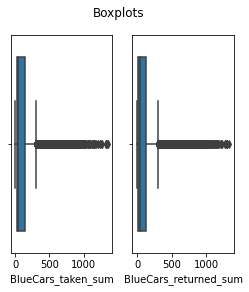

In [ ]:
#checking for outliers 
# we are checking for outliers in the blu cars variables since it will be the main attribute being investigated in the analysis.
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(4, 4))
fig.suptitle('Boxplots')
sns.boxplot(df['BlueCars_taken_sum'], ax=ax1)
sns.boxplot(df['BlueCars_returned_sum'], ax=ax2)
plt.show()

In [ ]:
#checking for anomalies
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3- Q1
IQR


Postal code               2070.0
n_daily_data_points          1.0
dayOfWeek                    4.0
BlueCars_taken_sum         115.0
BlueCars_returned_sum      115.0
Utilib_taken_sum             4.0
Utilib_returned_sum          4.0
Utilib_14_taken_sum          9.0
Utilib_14_returned_sum       9.0
Slots_freed_sum              5.0
Slots_taken_sum              5.0
dtype: float64

In [ ]:
#removing the anomalies
df1= df[~((df<(Q1 - 1.5* IQR)) | (df>(Q3 + 1.5* IQR))).any(axis=1)]
df1.shape

(9783, 13)

In [ ]:
# checking for missing values in the data
df1.isnull().any()
# there are no null values in the data 

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

## **UNIVARIATE ANALYSIS**

In [ ]:
#averge number of the bluecars taken 
df1["BlueCars_taken_sum"].mean()

49.242870285188594

In [ ]:
#mode of blue cars taken 
df1["BlueCars_taken_sum"].mode()

0    12
dtype: int64

In [ ]:
#median of blue cars taken
df1["BlueCars_taken_sum"].median()

34.0

In [ ]:
#average distance between each blue car taken and the mean number of cars taken 
df1["BlueCars_taken_sum"].std()


46.303794622721085

In [ ]:
#square of the average distance between each blue car taken and the mean number of blue cars taken 
df1["BlueCars_taken_sum"].var()

2144.041396463134

In [ ]:
#getting the kurtosis of the blue cars taken 
df1["BlueCars_taken_sum"].kurt()

# this indicates a heavy tailed playkurtic distribution 

3.9107948136076676

In [ ]:
#getting the skweneess of the blue cars taken attribute
df1["BlueCars_taken_sum"].skew()

1.7911948887384719

In [ ]:
#getting the quatiles of the bluecars taken 
df1['BlueCars_taken_sum'].quantile([0.25,0.5,0.75])

#Q1 o.25 is the median of the upper half of the data
#Q2 0.5 is the median of the whole data
#Q3 0.75 is the median of the lower half of the data 

0.25    17.0
0.50    34.0
0.75    67.0
Name: BlueCars_taken_sum, dtype: float64

In [ ]:
#getting the range of the blue cars taken 
bluecar_taken_max = df1["BlueCars_taken_sum"].max()
bluecar_taken_min = df1["BlueCars_taken_sum"].min()
bluecar_taken_max - bluecar_taken_min


293

In [ ]:
#getting the range of the blue cars returned
bluecar_returned_max = df1["BlueCars_returned_sum"].max()
bluecar_returned_min = df1["BlueCars_returned_sum"].min()
bluecar_returned_max - bluecar_returned_min

301

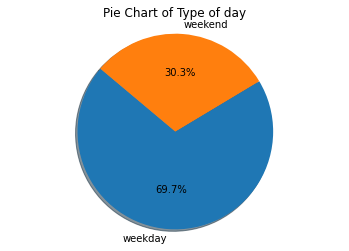

In [ ]:
# pie chart of percanatge of day types 
sum = df1['day_type'].value_counts()
status = ['weekday', 'weekend']
plt.pie(sum, labels = status, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Type of day')
plt.show()


In [ ]:
# frequency table of the day type 
df1['day_type'].value_counts()


weekday    6820
weekend    2963
Name: day_type, dtype: int64

In [ ]:
# frequency table of the postal code 
df1['Postal code'].value_counts()

# the postal code 92100 is the least popular postal code for picking and dropping cars 

94130    130
92160    130
91400    130
94450    130
94410    130
        ... 
93260    101
92800     82
93390     72
92130     65
92100      4
Name: Postal code, Length: 79, dtype: int64

Text(0.5, 1.0, 'Histogram of Bluecars taken')

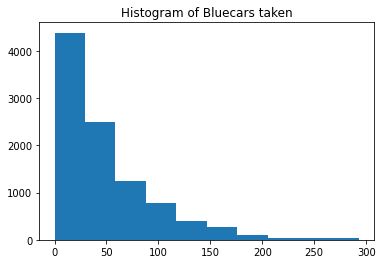

In [ ]:
#histogram of the blue cars taken 
plt.hist(df1['BlueCars_taken_sum'])
plt.title('Histogram of Bluecars taken')


Text(0.5, 1.0, 'Histogram of Bluecars taken')

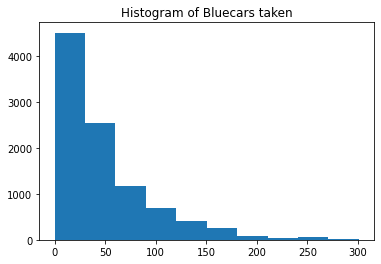

In [ ]:
#histogram of the blue cars returned
plt.hist(df1['BlueCars_returned_sum'])
plt.title('Histogram of Bluecars taken')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


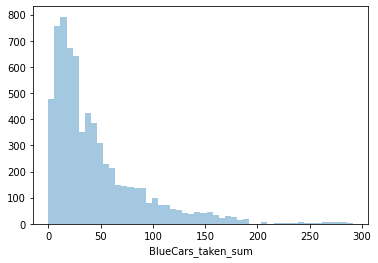

In [ ]:
#histogram of bluecars taken on a weekday 
weekday = df1[df1['day_type'] == 'weekday']
sns.distplot(weekday['BlueCars_taken_sum'],  kde=False,label='weekday')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


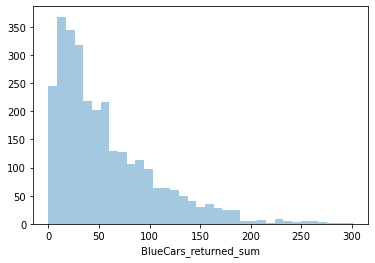

In [ ]:
#histogram of bluecars taken on a weekend
weekend = df1[df1['day_type'] == 'weekend']
sns.distplot(weekend['BlueCars_returned_sum'],  kde=False,label='weekend')


## **BIVARIATE ANALYSIS**

In [ ]:
# calculating correlation coefficients between differnt variables.
a = df1["BlueCars_taken_sum"].corr(df1["BlueCars_returned_sum"]) 
print(a)
b = df1["BlueCars_taken_sum"].corr(df1["Slots_freed_sum"])
print(b) 
c = df1["BlueCars_taken_sum"].corr(df1["Slots_taken_sum"])
print(c) 
d = df1["BlueCars_taken_sum"].corr(df1["dayOfWeek"]) 
print(d)
e = df1["BlueCars_returned_sum"].corr(df1['dayOfWeek'])
print(e)

# blue cars taken and blue cars returned have a strong positive correlation 
# blue cars taken and slots freed have a moderate positive correlation 
# blue cars taken and slots taken have a moderate positive correlation 
# blue cars taken and days of the week have a weak positive correlation 
# blue cars returned and day of the week have a weak positive correlation 

0.992041181514075
0.3129551080213337
0.31025685331520575
0.11073289250795774
0.10315946684635122


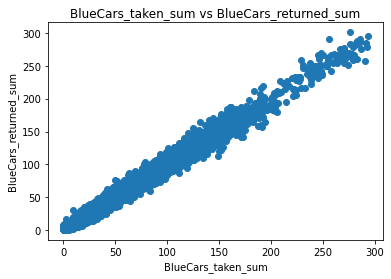

In [ ]:
# scatter plot of blue cars taken and blue cars returned 
plt.scatter(df1['BlueCars_taken_sum'], df1['BlueCars_returned_sum'])
plt.title('BlueCars_taken_sum vs BlueCars_returned_sum')
plt.xlabel('BlueCars_taken_sum')
plt.ylabel('BlueCars_returned_sum')
plt.show()

#the scatter plot graph shows positive correlation between blue cars taken and blue cars returned.

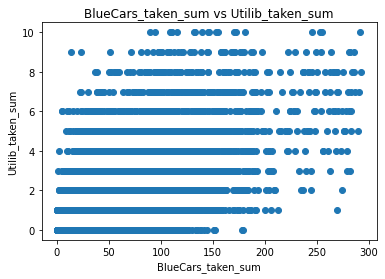

In [ ]:
# scatter plot of blue cars taken and utilib cars taken  
plt.scatter(df1['BlueCars_taken_sum'], df1['Utilib_taken_sum'])
plt.title('BlueCars_taken_sum vs Utilib_taken_sum')
plt.xlabel('BlueCars_taken_sum')
plt.ylabel('Utilib_taken_sum')
plt.show()

# the plot shows the blue cars taken and utilib cars have a weak correlation 

## **DATA SAMPLING ***

We will perform stratified sampling in the dataset since it maintains the populations proprotion. 
The attribute day type will be the strata with groups weekend and weekday. To create a stratified random sample we'll use pandas groupBy method. Basically what the method does is that it splits our dataset into sets and then applies a function on each subset.
In our case, we are going to apply a function that puts each subset into a random size.


In [ ]:
# Stratified sample
sample_df = df1.groupby('day_type', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

# proportion of the non_stratified sample
print(sample_df['day_type'].value_counts())

# Check the stratified output
sample_df

weekday    682
weekend    296
Name: day_type, dtype: int64


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
6816,92250,4/25/2018,1440,2,weekday,47,53,2,1,3,1,5,4
15351,94700,2/16/2018,1439,4,weekday,39,41,0,0,1,3,0,0
9568,92600,3/14/2018,1440,2,weekday,128,129,2,2,5,5,0,0
12609,93600,4/24/2018,1439,1,weekday,17,22,1,2,3,1,0,0
9694,92700,2/9/2018,1439,4,weekday,95,96,4,6,9,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4217,91400,1/7/2018,1440,6,weekend,9,9,0,0,1,0,0,0
7281,92290,4/22/2018,1440,6,weekend,23,23,1,0,1,0,0,0
11769,93360,5/6/2018,1439,6,weekend,24,19,0,0,3,4,0,0
13684,94130,4/8/2018,1440,6,weekend,70,61,0,0,2,2,0,0


In [ ]:
# creating a new sampled dataframe with the attributes for investigation in the hypothesis testing   
yes = sample_df[sample_df['day_type'] == 'weekday']
sample = yes[["BlueCars_taken_sum", "BlueCars_returned_sum"]]
sample

,BlueCars_taken_sum,BlueCars_returned_sum
6816,47,53
15351,39,41
9568,128,129
12609,17,22
9694,95,96
...,...,...
11568,23,28
15472,84,77
5085,266,265
5213,85,92


In [ ]:
# descriptive statistics of the sampled data to be used for testinf 
sample.describe()

,BlueCars_taken_sum,BlueCars_returned_sum
count,682.000000,682.000000
mean,49.203812,49.457478
std,46.761850,47.050216
min,0.000000,0.000000
25%,16.000000,16.000000
50%,33.000000,32.000000
75%,67.000000,67.000000
max,287.000000,276.000000


# HYPOTHESIS TESTING 

We are going to to test the claim that theres no differnece in the number of blue cars taken on weekdays and number of blue cars returned weekdays. 

Null Hypothesis Ho : Number of blue cars taken on weekday = bluecars returned on weekday  (claim)     
Alternate hypothesis Ha : Number of blue cars taken on weekday =! utilib cars taken on the weekday 

We are going to use the z test to test this hypothses since our sample size is greater than 30 and the samples are independent of each other and are equal and the population variance is known.  



In [ ]:
#importing libraries to test the hypothesis 
from scipy import stats
from statsmodels.stats import weightstats as stests
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
#comptuting the z test statistic and p value 

ztest ,p_value= stests.ztest(sample['BlueCars_taken_sum'], x2=sample['BlueCars_returned_sum'], value=0,alternative='two-sided')
print('the z statistic: ', ztest)
print('The p value is:', p_value)

if p_value < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

the z statistic:  -0.09986381689403051
The p value is: 0.9204524426434688
accept null hypothesis


RESULTS

The z core computed is negative which implies the raw score is below the mean average. 

The p value computed is greater than the level of signifance alpha of 0.05. We therefor fail to reject the null hypothesis. There is enough evidence to support the claim that theres no  difference in the number of blue cars taken and number of blue cars returned on a weekday. 